**写在前面**：本节内容是 [Datawhale三月的组队学习 - 集成学习（上）- CH2-机器学习基础模型回顾 -【Task1 机器学习的三大主要任务】](https://github.com/datawhalechina/team-learning-data-mining/tree/master/EnsembleLearning) 的学习笔记，对应notebook的1.1，1.2，1.3节，学习周期1天

## 导入库

In [62]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D # 见make_blobs
from sklearn.linear_model import LinearRegression # 见make_sparse_uncorrelated

## sklearn.datasets相关内容学习
**参考资料**： 
   - [官方文档](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)
   - [（数据科学学习手札21）sklearn.datasets常用功能详解](https://www.cnblogs.com/feffery/p/8686128.html)
   - [Sklearn提供的常用数据集](https://blog.csdn.net/weixin_42039090/article/details/80614918)
   - [Scikit-Learn模块学习笔记——数据集模块datasets](https://www.cnblogs.com/zhuyuanhao/p/5383628.html)

### 加载数据集

**小数据集**：本地加载
- 鸢尾花数据集：load_iris（）：用于**分类**任务的数据集
- 手写数字数据集：load_digits（）:用于**分类**任务或者**降维**任务的数据集
- 乳腺癌数据集load_breast_cancer（）：简单经典的用于**二分类**任务的数据集
- 糖尿病数据集：load_diabetes（）：经典的用于**回归**任务的数据集。这10个特征中的每个特征都已经被处理成0均值，方差归一化的特征值。
- 波士顿房价数据集：load_boston（）：经典的用于**回归**任务的数据集
- 体能训练数据集：load_linnerud（）：经典的用于**多变量回归**任务的数据集。

**大数据集**：需要下载
- load_mlcomp()
- fetch_california_housing()
- fetch_olivetti_faces()
- fetch_lfw_people()
- fetch_lfw_pairs()
- fetch_20newsgroups()
- fetch_20newsgroups_vectorized()
- fetch_rcv1()
- fetch_mldata()
- mldata_filename()
- fetch_covtype()

#### 载入小数据集

In [11]:
iris = datasets.load_iris()
digits = datasets.load_digits()
cancer = datasets.load_breast_cancer()
diabets = datasets.load_diabetes()
boston = datasets.load_boston()
linnerud = datasets.load_linnerud()

#### 查看keys
这块没啥用，单纯就是个人好奇。。

In [49]:
keysdf = pd.DataFrame()
def read_keys(dataset):
    global keysdf
    keysdf = keysdf.append({key:True for key in sorted(list(dataset.keys()))},ignore_index=True)

read_keys(iris)
read_keys(digits)
read_keys(cancer)
read_keys(diabets)
read_keys(boston)
read_keys(linnerud)

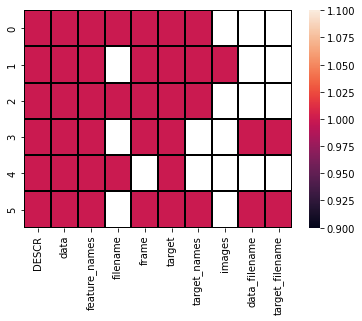

In [67]:
sns.heatmap(keysdf,linewidths=1,linecolor='k');

根据以上结果可以发现DESCR、data、feature_names、target是所有dataset都有的key。
    - DESCR:数据描述
    - data:特征数据数组
    - feature_names:特征名
    - target:标签数组
其他
    - filename:文件路径
    - frame:都是None，不知道是啥
    - target_names:分类任务的分类标签
    - images:图片，digits手写数据集的图片数据
    - data_filname:data文件路径
    - taget_filename:target文件路径

#### 查看数据

In [201]:
def read_data(dataset):
    X = dataset.data
    y = dataset.target
    features = dataset.feature_names
    dataset_df = pd.DataFrame(X,columns=features)
    dataset_df['target'] = y
    return dataset_df.head(3)

In [202]:
read_data(iris)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2


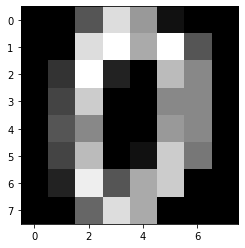

In [209]:
plt.imshow(digits['images'][0],cmap='gray')
read_data(digits)

In [210]:
read_data(cancer)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [211]:
read_data(diabets)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0


In [212]:
read_data(boston)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


### 生成数据集
1. 回归(regression)
    - make_regression()
    - make_sparse_uncorrelated()
    - make_friedman1()
    - make_friedman2()
    - make_friedman3()
2. 分类(classification)
    1. 单标签
        - make_classification()
        - make_blobs()
        - make_gaussian_quantiles()
        - make_hastie_10_2()
        - make_circles()
        - make_moons()
    2. 多标签
        - make_multilabel_classification()
    3. 双聚类
        - make_biclusters()
        - make_checkerboard()
3. 流形学习(manifold learning)
    - make_s_curve()
    - make_swiss_roll()
4. 可降维(decomposition)
    - make_low_rank_matrix()
    - make_sparse_coded_signal()
    - make_spd_matrix()
    - make_sparse_spd_matrix()
    
**注**：本部分仅学习task里用到的`make_moons()`和`make_blobs()`，然后学一个生成回归数据的函数make_friedman1()。其他内容随缘吧，用到再说。。

### make_moons
生成月牙形数据，用于分类（好像只能二分类）和聚类
详细可参考：[sklearn.datasets.make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html)

参数：
- `n_samples`:如果为int，则生成的总点数。如果是两个元素的元组，则为两个月亮中每个月亮的点数。
- `shuffle`:Whether to shuffle the `amples.（不知道具体指什么）
- `noise`:添加高斯噪声
- `random_state`:随机种子

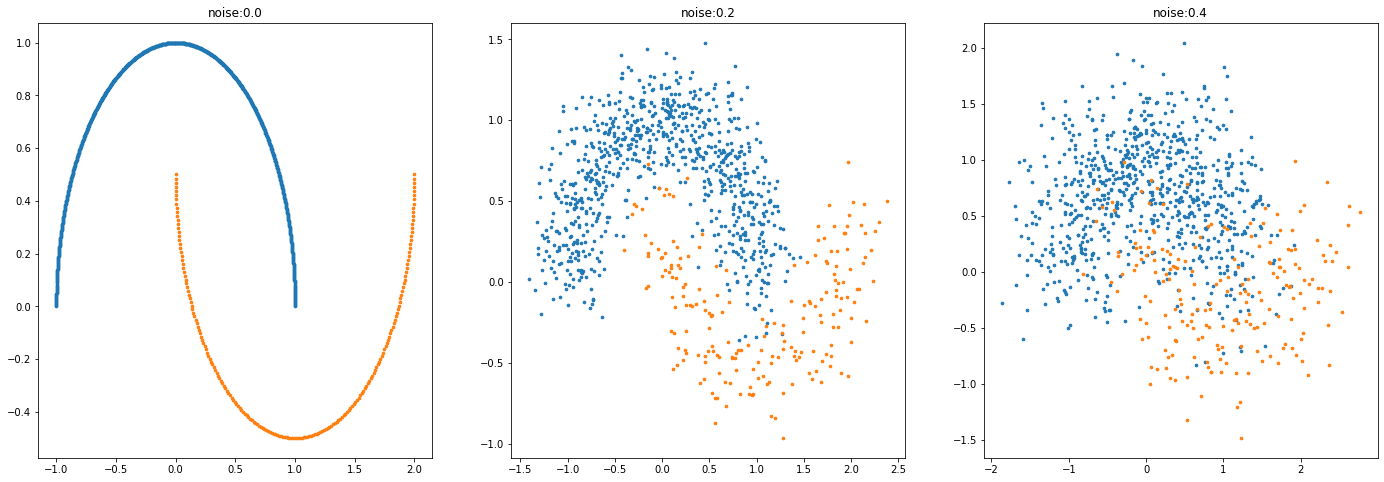

In [111]:
# 改变noise
plt.figure(figsize=(24,8))
for i in range(3):
    plt.subplot(1,3,i+1)
    x,y = datasets.make_moons(
        n_samples=(800,200), shuffle=True,noise=0.2*i, random_state=315
    )
    for index,c in enumerate(np.unique(y)):
        plt.scatter(x[y==c,0],x[y==c,1],s=7)
        plt.title('noise:'+str(0.2*i))
plt.show()

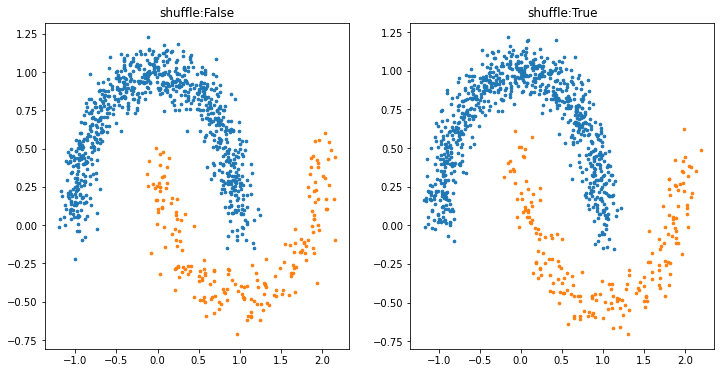

In [115]:
# 改变shuffle
plt.figure(figsize=(12,6))
for i in range(2):
    plt.subplot(1,2,i+1)
    x,y = datasets.make_moons(
        n_samples=(800,200), shuffle=bool(i), noise=0.1, random_state=315
    )
    for index,c in enumerate(np.unique(y)):
        plt.scatter(x[y==c,0],x[y==c,1],s=7)
        plt.title('shuffle:'+str(bool(i)))
plt.show()

可以发现noise对点的分布影响还是很大的，然而还是不知道shuffle在干嘛

### make_blobs
生成符合正态分布的聚类数据  
详细可参考：[sklearn.datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)

参数：
- `n_samples`:如果为int，则是在簇之间平均分配的点的总数。如果是数组，则序列中的每个元素表示每个簇的样本数
- `n_features`:每个样本的特征数量（我理解为维数）
- `centers`:生成的中心数或固定的中心位置。如果n_samples是一个int值，并且center是None，则生成3个中心。如果n_samples类似于数组，则中心必须为None或长度等于n_samples长度的数组。
- `cluser_std`:聚类的标准差
- `center_box`:随机生成中心时每个聚类中心的边界框(不是很理解）
- `shuffle`:Shuffle the samples.（不知道具体指什么）
- `random_state`:随机种子
- `return_centers`:如果为True，则返回每个聚类的中心

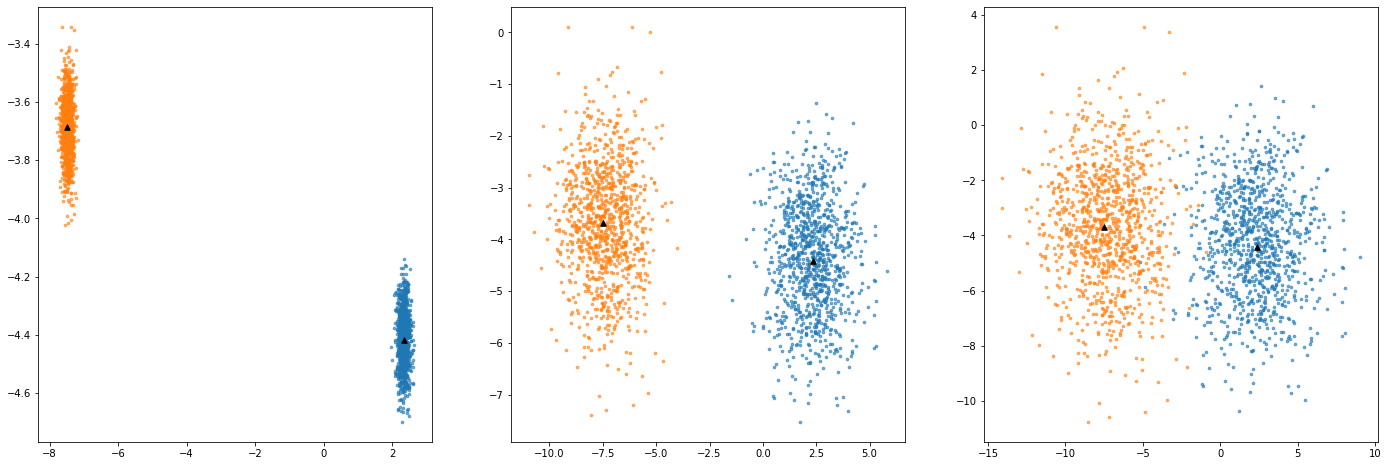

In [172]:
# 和cluster_std的关系
plt.figure(figsize=(24,8))
for i in range(3):
    plt.subplot(1,3,i+1)
    x, y, center = datasets.make_blobs(
        n_samples=2000, n_features=2, centers=2, cluster_std=i+0.1, random_state=315, return_centers=True
    )
    for index,c in enumerate(np.unique(y)):
        plt.scatter(x[y==c, 0], x[y==c, 1],s=7,alpha=0.6)
        plt.scatter(center[index,0],center[index,1],s=30,c='k',marker='^')
plt.show()

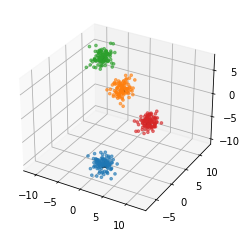

In [160]:
# 3D图(并没有看见中心点，不知道是不是被遮住了)
fig = plt.figure()
ax = plt.axes(projection='3d')

x, y, center = datasets.make_blobs(
    n_samples=400, n_features=3, centers=4, random_state=315, return_centers=True
)
for index,c in enumerate(np.unique(y)):
    ax.scatter(x[y==c, 0],x[y==c, 1],x[y==c, 2],s=7,alpha=0.6)
    ax.scatter(center[index,0],center[index,1],center[index,2],s=30,c='k',marker='^')
plt.show()

### make_sparse_uncorrelated
生成稀疏的不相关设计的随机回归问题

**注**：Only the first 4 features are informative. The remaining features are useless.(那为什么n_fetures默认为10？迷惑)
```
X ~ N(0, 1)
y(X) = X[:, 0] + 2 * X[:, 1] - 2 * X[:, 2] - 1.5 * X[:, 3]
```
详细可参考：[sklearn.datasets.make_sparse_uncorrelated](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_sparse_uncorrelated.html#sklearn.datasets.make_sparse_uncorrelated)

参数：
- `n_samples`:样本数
- `n_features`:功能数量(至少4个)
- `random_state`:随机种子

In [187]:
# 4维
x, y = datasets.make_sparse_uncorrelated(n_samples=300, n_features=4)
LR = LinearRegression()
LR.fit(x,y)
LR.coef_

array([ 1.01715587,  2.09671088, -1.98877774, -1.60197831])

In [196]:
# 6维
x, y = datasets.make_sparse_uncorrelated(n_samples=500, n_features=7)
LR = LinearRegression()
LR.fit(x,y)
LR.coef_

array([ 0.96400471,  1.99379778, -2.07576882, -1.50497218, -0.05655078,
        0.01209262,  0.04683102])